**Predicting customer churn rate in telecommunications industry**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Sparta_CodingClub_Telco_Customer.csv")

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Change 'total charges' which currently is an object, into float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

ValueError: ignored

In [ ]:
#Error as 'unable to parse string " " -> Need to change " " to 0
df['TotalCharges'] = df['TotalCharges'].replace({" ": 0})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Comparison of discontinued and present customers**

In [ ]:
df.groupby("Churn")["customerID"].count()

Churn
No     5174
Yes    1869
Name: customerID, dtype: int64

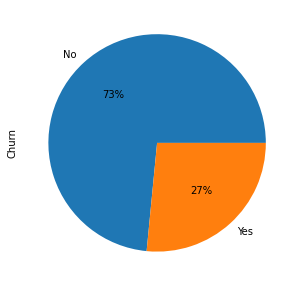

In [ ]:
df.Churn.value_counts().plot(kind='pie', y='Churn', figsize=(5, 5), autopct='%1.0f%%')

Discontinued customers: 1869
Present customers: 5174

In [ ]:
#Present customer info
customer_stay = df[['MonthlyCharges','tenure']][df['Churn'] == 'No']
customer_stay.describe()

,MonthlyCharges,tenure
count,5174.000000,5174.000000
mean,61.265124,37.569965
std,31.092648,24.113777
min,18.250000,0.000000
25%,25.100000,15.000000
50%,64.425000,38.000000
75%,88.400000,61.000000
max,118.750000,72.000000


In [ ]:
#Discontinued customer info
customer_churn = df[['MonthlyCharges','tenure']][df['Churn'] == 'Yes']
customer_churn.describe()

,MonthlyCharges,tenure
count,1869.000000,1869.000000
mean,74.441332,17.979133
std,24.666053,19.531123
min,18.850000,1.000000
25%,56.150000,2.000000
50%,79.650000,10.000000
75%,94.200000,29.000000
max,118.350000,72.000000


Above could infer discontinued customers were charged higher monthly charges on average (discontinued: 74, present: 61). Tenure of present customer is obviously longer than ex customers.

(array([877., 259., 159., 114., 102.,  98.,  72.,  70.,  46.,  72.]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 10 Patch objects>)

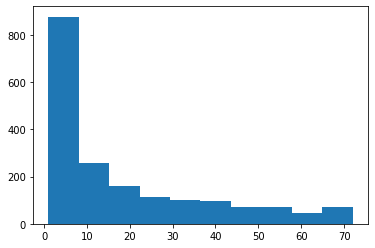

In [ ]:
#histogram of ex customers' tenure to see exact retention period
plt.hist(customer_churn["tenure"])

Majority of people discontinued their service over the time of 10 months and the curve slows down afterwards. 

**Churned customer clustering**

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Filter the discontinued customers' 'MonthlyCharges'and 'tenure'
Churn_monthly_tenure = df[['MonthlyCharges','tenure']][df['Churn'] == 'Yes']
Churn_monthly_tenure

,MonthlyCharges,tenure
2,53.85,2
4,70.70,2
5,99.65,8
8,104.80,28
13,103.70,49
...,...,...
7021,59.80,12
7026,44.20,9
7032,75.75,1
7034,102.95,67


In [ ]:
#Data normalization
scaler = MinMaxScaler()
Churn_monthly_tenure_standardized = pd.DataFrame(scaler.fit_transform(Churn_monthly_tenure))
Churn_monthly_tenure_standardized.columns = ['MonthlyCharges','tenure']
Churn_monthly_tenure_standardized

,MonthlyCharges,tenure
0,0.351759,0.014085
1,0.521106,0.014085
2,0.812060,0.098592
3,0.863819,0.380282
4,0.852764,0.676056
...,...,...
1864,0.411558,0.154930
1865,0.254774,0.112676
1866,0.571859,0.000000
1867,0.845226,0.929577


In [ ]:
#Make 3 cluster with K-means
kmeans = KMeans(n_clusters=3, random_state=42).fit(Churn_monthly_tenure_standardized)
Churn_monthly_tenure_standardized['cluster'] = kmeans.labels_
Churn_monthly_tenure_standardized

,MonthlyCharges,tenure,cluster
0,0.351759,0.014085,0
1,0.521106,0.014085,2
2,0.812060,0.098592,2
3,0.863819,0.380282,1
4,0.852764,0.676056,1
...,...,...,...
1864,0.411558,0.154930,0
1865,0.254774,0.112676,0
1866,0.571859,0.000000,2
1867,0.845226,0.929577,1


In [ ]:
Churn_monthly_tenure_standardized.groupby('cluster').count()

,MonthlyCharges,tenure
cluster,,
0,456,456
1,464,464
2,949,949


In [ ]:
Churn_monthly_tenure_standardized.groupby("cluster").mean()

,MonthlyCharges,tenure
cluster,,
0,0.195918,0.085125
1,0.722425,0.655628
2,0.652981,0.109515


Cluster 1 has the highest monthly charges(0.72) and tenure(0.65), followed by cluster 2 and lastly 0. Cluster 2 is noticeable that it has fairly high monthly charges but somehow low tenure. More investigation to be held for this.

**Visualization**

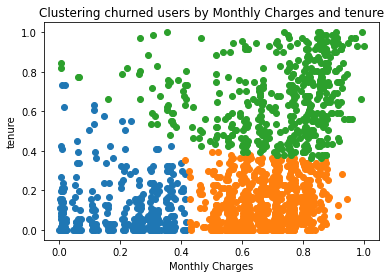

In [ ]:
#Scatterplot of clusters
for i in Churn_monthly_tenure_standardized["cluster"].unique():
    tmp = Churn_monthly_tenure_standardized[Churn_monthly_tenure_standardized["cluster"]==i]
    plt.scatter(tmp['MonthlyCharges'], tmp['tenure']) 

plt.title('Clustering churned users by Monthly Charges and tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('tenure')
plt.show()

The ones with low monthly charges mostly quit instantly, not holding back for a longer period of time. It's quite understandable for the ones with high monthly charges to decide to discontinue and perhaps look for a more affordable option. 

In [ ]:
del df["customerID"]

KeyError: ignored

**Data preprocessing**

In [ ]:
df.describe()

In [ ]:
#Go all binary
gender_map = {"Female" : 0, "Male": 1}
yes_no_map = {"Yes" : 1, "No" : 0}

df["gender"] = df["gender"].replace(gender_map)
df["Partner"] = df["Partner"].replace(yes_no_map)
df["Dependents"] = df["Dependents"].replace(yes_no_map)
df["PhoneService"] = df["PhoneService"].replace(yes_no_map)
df["PaperlessBilling"] = df["PaperlessBilling"].replace(yes_no_map)
df["Churn"] = df["Churn"].replace(yes_no_map)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,1


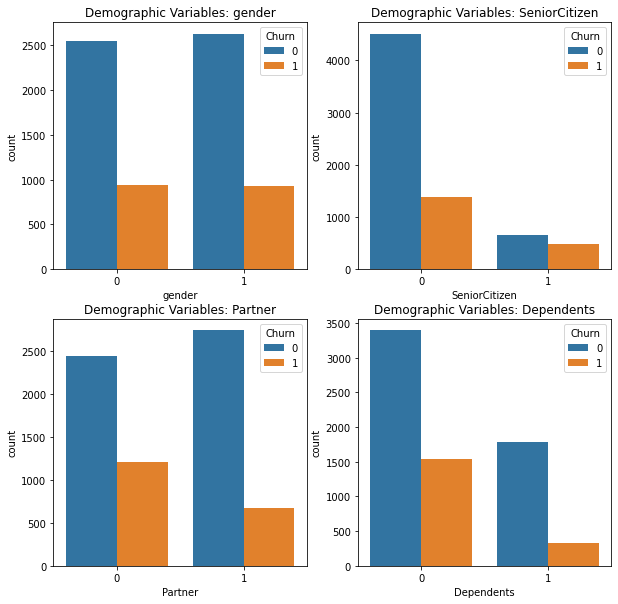

In [ ]:
#Bar chart
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(10, 10)

sns.countplot(x='gender', data=df, ax=ax1, hue="Churn").set_title('Demographic Variables: gender')
sns.countplot(x='SeniorCitizen', hue="Churn", data=df, ax=ax2).set_title('Demographic Variables: SeniorCitizen')
sns.countplot(x='Partner', hue="Churn", data=df, ax=ax3).set_title('Demographic Variables: Partner')
sns.countplot(x='Dependents', hue="Churn", data=df, ax=ax4).set_title('Demographic Variables: Dependents')

plt.show()

We can infer young people tend to discontinue the service more often than senior citizens as the process would be a little burdensome. Those without a partner or dependents tend to discontinue more than the ones with significant other, as it may be that they make independent decisions of their own will. 

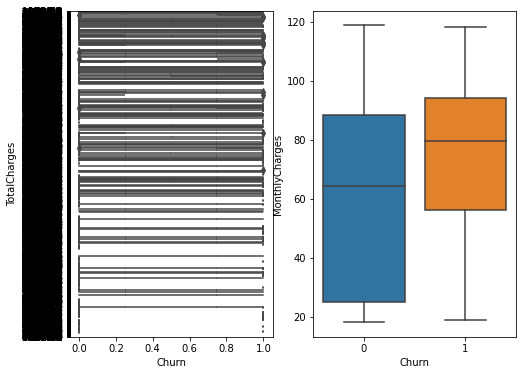

In [ ]:
#Box plot
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize= (8, 6))
sns.boxplot(x = 'Churn',  y = 'TotalCharges', data = df, ax=ax1)
sns.boxplot(x = 'Churn',  y = 'MonthlyCharges', data = df, ax=ax2)

Add dummie variables

In [ ]:
final_df = pd.get_dummies(df)

In [ ]:
final_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,0,1,0,1,0,1,29.85,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,34,1,0,56.95,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,2,1,1,53.85,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,45,0,0,42.30,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,1,1,70.70,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,0,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,0,1,1,72,1,1,103.20,0,0,...,0,0,0,0,0,0,0,0,0,0
7040,0,0,1,1,11,0,1,29.60,0,0,...,0,0,0,0,0,0,0,0,0,0
7041,1,1,1,0,4,1,1,74.40,1,0,...,0,0,0,0,0,0,0,0,0,0


Machine learning prediction of customer churn rate

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
X = final_df.drop(['Churn'], axis=1)
y = final_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def get_metrics(model): 
    y_pred = model.predict(X_test) 
    y = y_test 
    print()
    print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')
    print()
    print('Accuracy of test data:' , accuracy_score(y, y_pred)*100 , '%' )
    print()
    f1score = f1_score(y,y_pred)
    precision = precision_score(y,y_pred)
    recall = recall_score(y,y_pred)
    score_dict = { 'f1_score':[f1score], 'precision':[precision], 'recall':[recall]}
    score_frame = pd.DataFrame(score_dict)
    print(score_frame)

In [ ]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(X_train, y_train) 
print('Accuracy of train data:',lr.score(X_train,y_train)*100,'%')
get_metrics(lr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


훈련 데이터에 대한 정확도 : 81.48739794107206 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

테스트 데이터에 대한 정확도 : 81.61816891412349 %

   f1_score  precision    recall
0  0.636746   0.667647  0.608579


In [ ]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(X_train, y_train)
print('Accuracy of train data:',tree.score(X_train, y_train)*100,'%')
get_metrics(tree)

Accruacy of train data: 81.1324103656372 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

테스트 데이터에 대한 정확도 : 80.0567778566359 %

   f1_score  precision    recall
0   0.58858   0.648387  0.538874
